# (Loans Visualization )
## by (Mohamed Gamal )

## Investigation Overview

>Trying to check the criteria of person which get loans and the any parameter affact the increasing the investmment to this loans.

## Dataset Overview

> this data set have information about borrower and investment from prospoer website which specilized in loans mangment 

#### Trying to check the criteria of person which get loans and the any parameter affact the increasing the investmment to this loans
> So  selecting  this specific data which i think it will help me to extract answers for my question

In [79]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [80]:
# load in the dataset into a pandas dataframe
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")
#uploading data set 
loan = pd.read_csv('prosperLoanData.csv')
loan.head()
loan.shape
df= loan[['ListingKey','ListingNumber','CreditGrade','ClosedDate','EmploymentStatus',
            'IsBorrowerHomeowner','IncomeRange','IncomeVerifiable',
            'LoanCurrentDaysDelinquent','MemberKey','Investors',
          'BankcardUtilization','EstimatedLoss','EstimatedReturn', 
          'BorrowerAPR', 'LoanMonthsSinceOrigination', 
          'LoanOriginalAmount', 'MonthlyLoanPayment',
          'AmountDelinquent','Occupation',
          'Term','StatedMonthlyIncome',
          'ListingCategory (numeric)','ProsperRating (Alpha)','LoanStatus','AvailableBankcardCredit','Recommendations','ProsperScore','PercentFunded',
          'TradesOpenedLast6Months']]
df.head()
df.info()
df.IsBorrowerHomeowner.value_counts()
plt.figure(figsize = [8, 10])
labels = 'Owning Home', 'Not Owning Home'
sizes = df.IsBorrowerHomeowner.value_counts()
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ListingKey                  113937 non-null  object 
 1   ListingNumber               113937 non-null  int64  
 2   CreditGrade                 28953 non-null   object 
 3   ClosedDate                  55089 non-null   object 
 4   EmploymentStatus            111682 non-null  object 
 5   IsBorrowerHomeowner         113937 non-null  bool   
 6   IncomeRange                 113937 non-null  object 
 7   IncomeVerifiable            113937 non-null  bool   
 8   LoanCurrentDaysDelinquent   113937 non-null  int64  
 9   MemberKey                   113937 non-null  object 
 10  Investors                   113937 non-null  int64  
 11  BankcardUtilization         106333 non-null  float64
 12  EstimatedLoss               84853 non-null   float64
 13  EstimatedRetur

<Figure size 576x720 with 0 Axes>

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Univaraint 
> univaritent parameters presentation 
>In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

<Figure size 576x720 with 0 Axes>

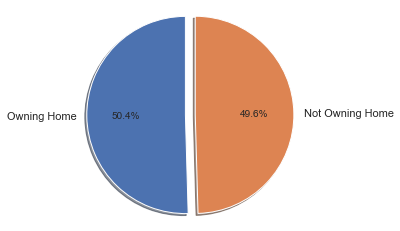

In [81]:
plt.figure(figsize = [8, 10])
labels = 'Owning Home', 'Not Owning Home'
sizes = df.IsBorrowerHomeowner.value_counts()
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')  
plt.show()

##### answer : borrows who have loans around 50% of them didn't own home so owning home not affect the granting loans to person 

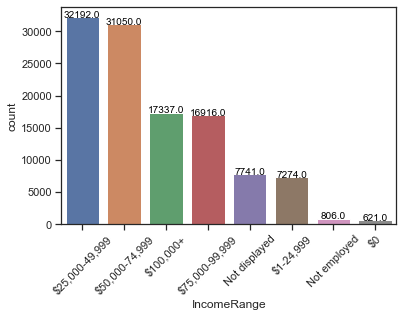

In [82]:
df.IncomeRange.value_counts()
# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
type_counts = df["IncomeRange"].value_counts()
type_order = type_counts.index
sb.countplot(data=df, x="IncomeRange", order=type_order);
n_df = df["IncomeRange"].value_counts().sum()
# get the current tick locations and labels
locs, labels = plt.xticks(rotation=45) 
# loop through each pair of lodf.head cations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}'.format(count)
    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
    

####  most of the borrower have income range from ( 25K : 50K) dollar
#### Make sure that, after every plot or related series of plots, that you include a Markdown cell with comments about what you        observed, and what you plan on investigating next.

In [83]:
df_credit_grade =  df.CreditGrade.value_counts()
df_credit_grade
df['BankcardUtilization'].dropna(inplace = True )
df['AvailableBankcardCredit'].dropna(inplace = True )
df['AvailableBankcardCredit'].shape


(106393,)

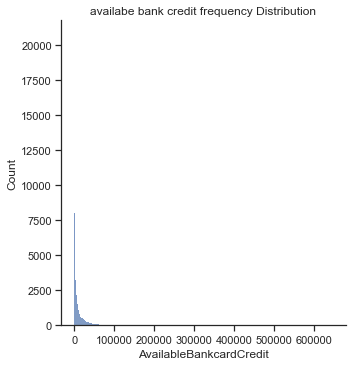

In [84]:
sb.displot(df , x="AvailableBankcardCredit" , bins = 'auto' )
plt.title('availabe bank credit frequency Distribution');

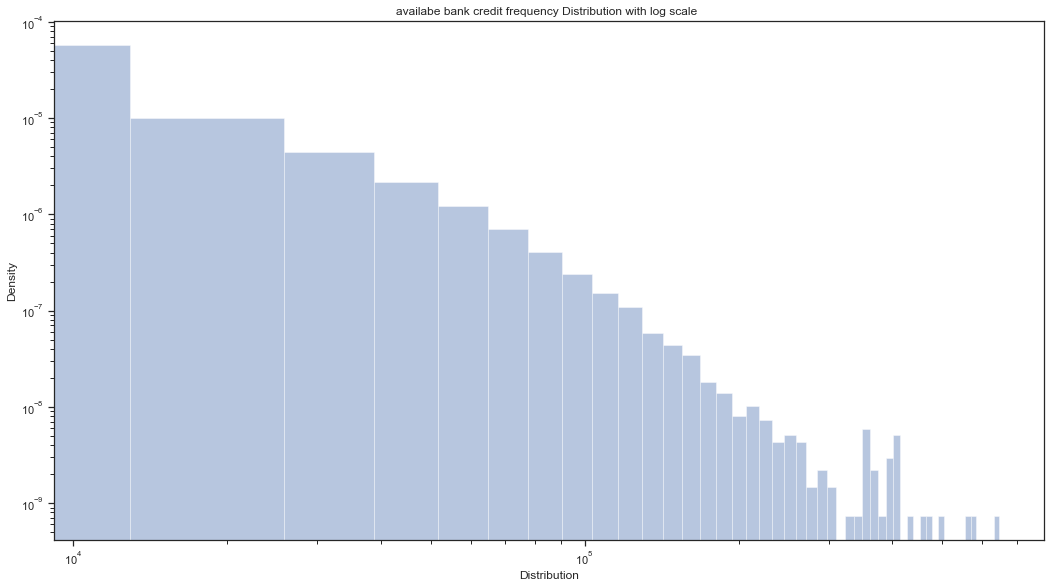

In [85]:
f, ax = plt.subplots(figsize=(14.7, 8.27))
ax.set(xscale="log", yscale="log")
sb.distplot(df['AvailableBankcardCredit']  , vertical= False , norm_hist=False,
            axlabel='Distribution',label=" Borrower Annual Percent Rate " )
plt.title('availabe bank credit frequency Distribution with log scale ');
plt.tight_layout();

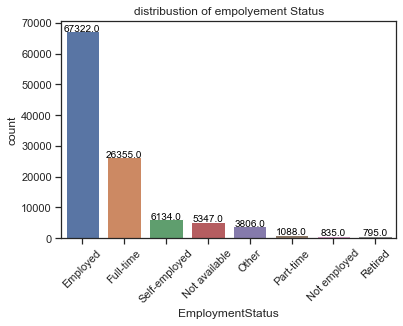

In [86]:
#Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
type_counts = df["EmploymentStatus"].value_counts()
type_order = type_counts.index
sb.countplot(data=df, x="EmploymentStatus", order=type_order);
n_df = df["EmploymentStatus"].value_counts().sum()
# get the current tick locations and labels
locs, labels = plt.xticks(rotation=45) 
plt.title('distribustion of empolyement Status');
# loop through each pair of lodf.head cations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

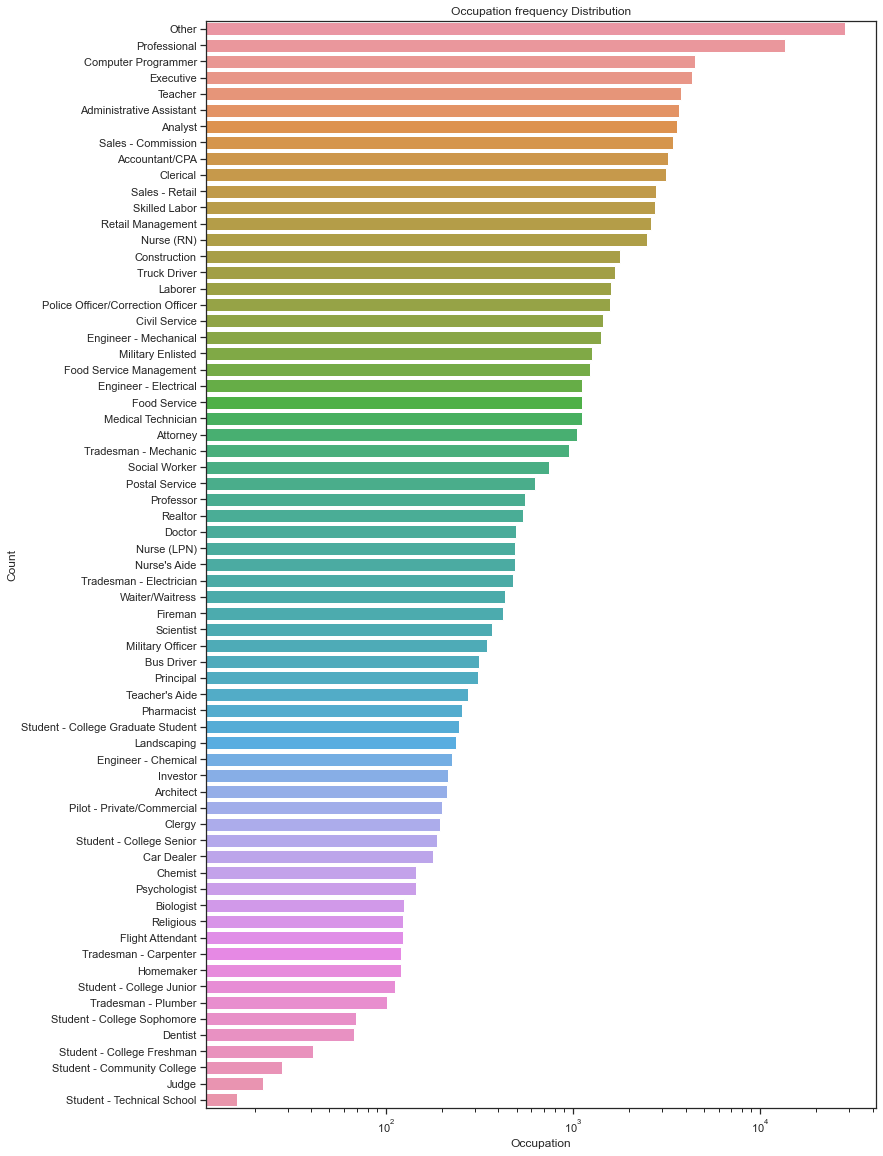

In [87]:
type_counts = df['Occupation'].value_counts()
type_order = type_counts.index
plt.figure(figsize=[12,20]);
sb.countplot(data = df,y= 'Occupation' , order=type_order);
plt.title('Occupation frequency Distribution');
plt.ylabel('Count')
plt.xlabel('Occupation')
plt.xscale ('log')

#### above plot to show trend of occupuation and acorrding to graph above we found trend for people without recoded name , also second names with tricky name is Professional , but the third is programmer and less is student techincal school and i think is normal¶
> in general we have maginfier which tells us which people occupation is tend to borrow .

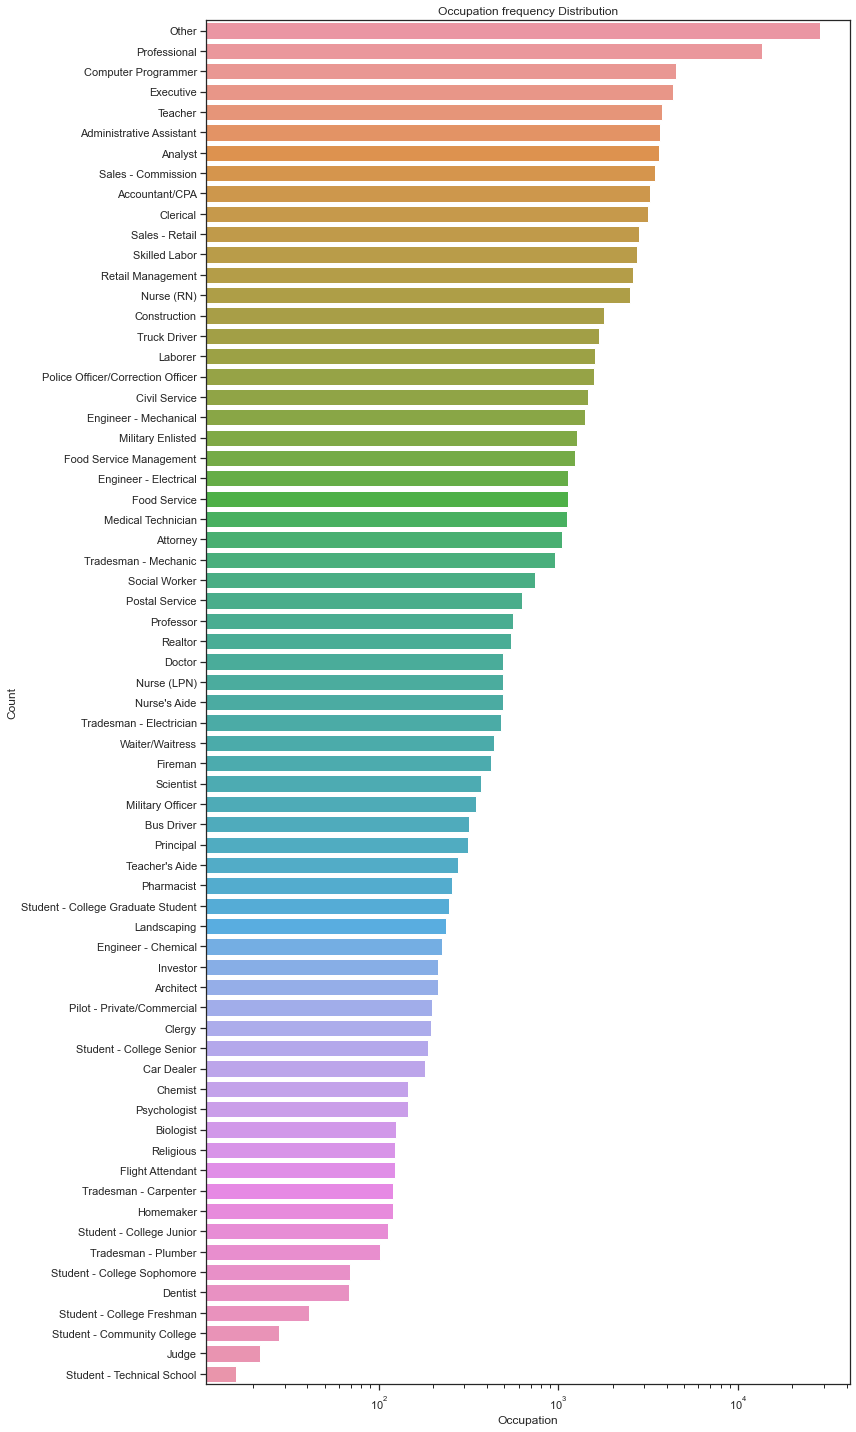

In [88]:
type_counts = df['Occupation'].value_counts()
type_order = type_counts.index
plt.figure(figsize=[12,20]);
sb.countplot(data = df,y= 'Occupation' , order=type_order);
plt.title('Occupation frequency Distribution');
plt.ylabel('Count')
plt.xlabel('Occupation')
plt.xscale ('log')
plt.tight_layout();

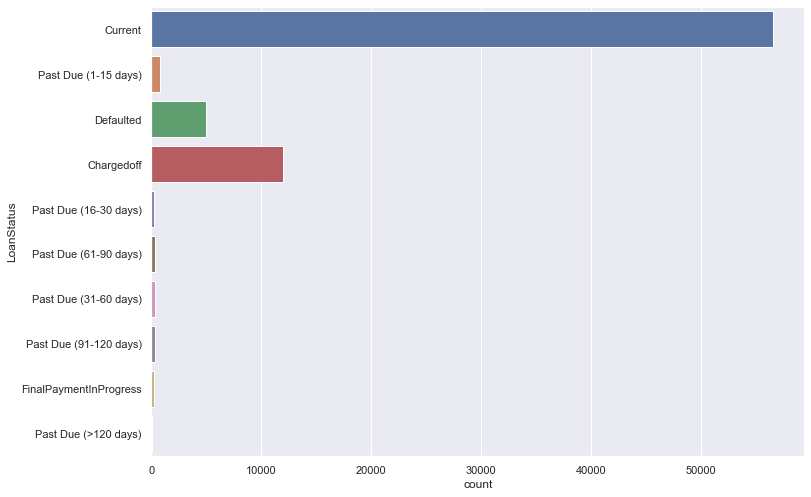

In [89]:
df["LoanStatus"].value_counts()
df.drop(df[df['LoanStatus'] == 'Completed' ].index, inplace=True)
df.drop(df[df['LoanStatus'] == 'FinalPaymentInProgress ' ].index, inplace=True)
df.drop(df[df['LoanStatus'] == 'Cancelled' ].index, inplace=True)
sb.set_theme(style="darkgrid")
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax.set()
sb.countplot(data = df, y = 'LoanStatus' , ax=ax )



## Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
> draw a conculasion about the borower (ownhome or not , his occupation , income range , annual rate for loans ) borrows who 
> have loans around 50% of them didn't own home so owning home not affect the granting loans to person . found most of the 
> borrower have income range from ( 25K : 50K) dollar found most of the borrowe is empolyed .

##### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
> i used scale to show the distribution of bank utilization ! also occupation


## Bivariate Exploration
In this section, investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).

in this Section we introduced some relation between two factor to the study the effect of some varible to each other
i will make a relation between 2 varible which will study relation between
lonaer criteria and investment to show if this studied criteria affect the investment .

In [90]:
df_home_True = df.query('IsBorrowerHomeowner ==  True ')
df_home_False = df.query('IsBorrowerHomeowner ==  False ')
df_home_False.info()
ct_counts = df.groupby(['IncomeRange', 'IsBorrowerHomeowner']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'IncomeRange', columns = 'IsBorrowerHomeowner', values = 'count')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36662 entries, 1 to 113936
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ListingKey                  36662 non-null  object 
 1   ListingNumber               36662 non-null  int64  
 2   CreditGrade                 5998 non-null   object 
 3   ClosedDate                  9405 non-null   object 
 4   EmploymentStatus            36055 non-null  object 
 5   IsBorrowerHomeowner         36662 non-null  bool   
 6   IncomeRange                 36662 non-null  object 
 7   IncomeVerifiable            36662 non-null  bool   
 8   LoanCurrentDaysDelinquent   36662 non-null  int64  
 9   MemberKey                   36662 non-null  object 
 10  Investors                   36662 non-null  int64  
 11  BankcardUtilization         34521 non-null  float64
 12  EstimatedLoss               30660 non-null  float64
 13  EstimatedReturn             30

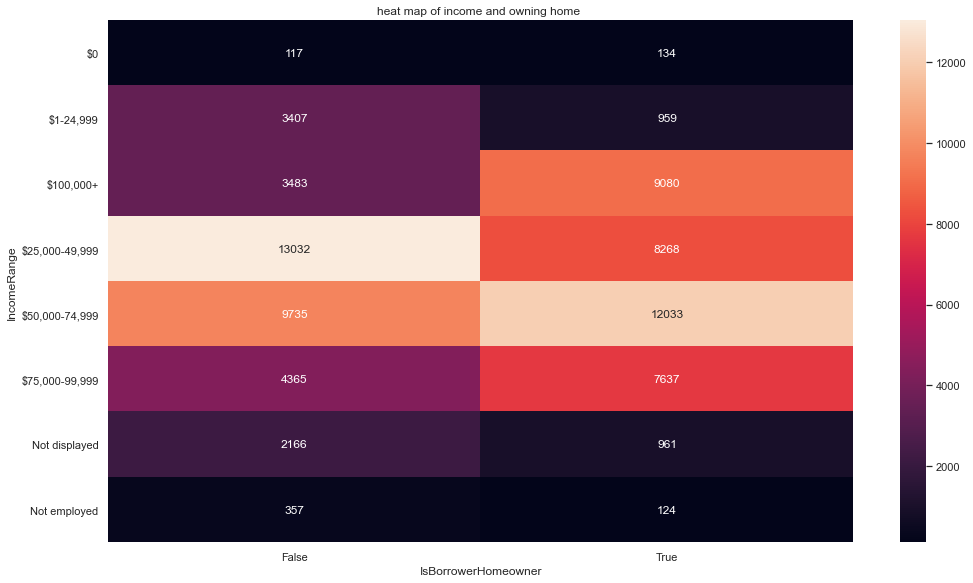

In [91]:
fig, ax = plt.subplots(figsize= [ 14.70, 8.27])
sb.heatmap(ct_counts , annot = True, fmt = 'd' , ax = ax )
plt.title('heat map of income and owning home ');
plt.tight_layout();

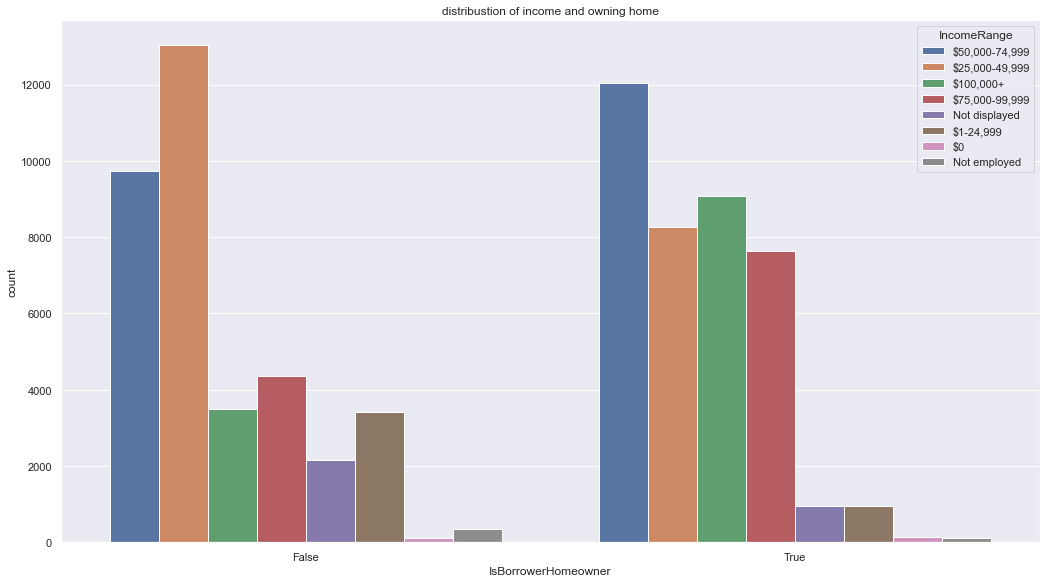

In [92]:
sb.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize= [ 14.70, 8.27])
sb.countplot(data = df, x = 'IsBorrowerHomeowner', hue= 'IncomeRange' , ax = ax )
plt.title('distribustion of income and owning home');
plt.tight_layout();

#### used to different method to observe the relation between owning home and income range and liky found that the range of 100k dollar is person who owning home is more 

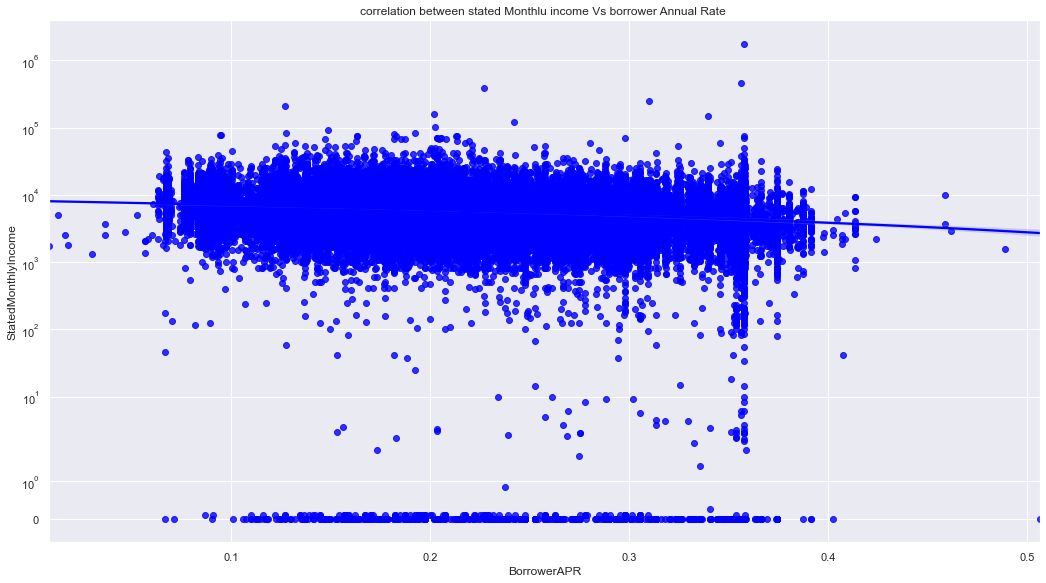

In [93]:
#regression plot to show the line which represent the correlation .
fig, ax = plt.subplots(figsize= [ 14.70, 8.27])
sb.regplot(data = df,y = 'StatedMonthlyIncome', x = 'BorrowerAPR', color = 'blue'  , ax = ax );
plt.xlabel('BorrowerAPR')
plt.ylabel('StatedMonthlyIncome')
plt.yscale('symlog')
plt.title('correlation between stated Monthlu income Vs borrower Annual Rate ');
plt.tight_layout();

### Test relation between two quantattive values
### correlation factor is very small of colleration and graph

In [94]:
df['BorrowerAPR'].corr(df['StatedMonthlyIncome'])

-0.10125672593183953

In [95]:
a=np.random.random(100)*0.5 #a uniform distribution
b=np.random.normal(100)*0.5 #a normal distribution
c=np.random.random(100)*0.5 #a uniform distribution
d=np.random.random(100)*0.5 #a uniform distribution
e=np.random.random(100)*0.5 #a uniform distribution
f=np.random.random(100)*0.5 #a uniform distribution
bins=np.histogram(np.hstack((a,b,c,d,e,f)), bins=40)[1] #get the bin edges
Rating = ['C',  'D', 'E','HR','A','B']
Classes = pd.api.types.CategoricalDtype(ordered=True, categories = Rating);
df["ProsperRating (Alpha)"] = df["ProsperRating (Alpha)"].astype(Classes);

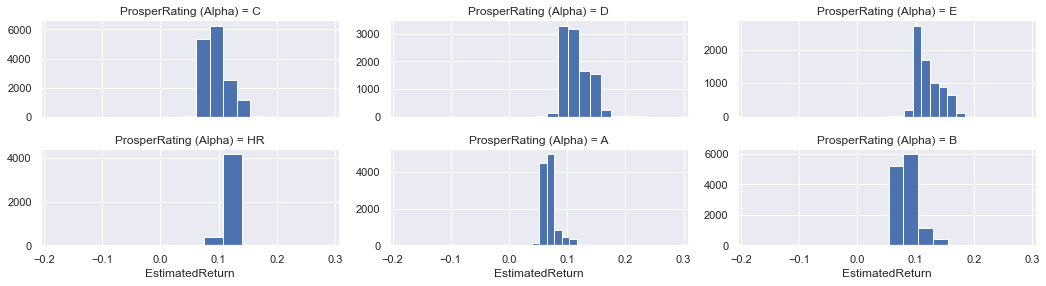

In [96]:
#Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = df , col = "ProsperRating (Alpha)" , col_wrap=3, sharey=False , height = 8.27/4,  aspect = (14.70/3)/(8.27/4));
g.map(plt.hist, "EstimatedReturn" );
plt.tight_layout();

#### representing sample prospor rating and estimated return

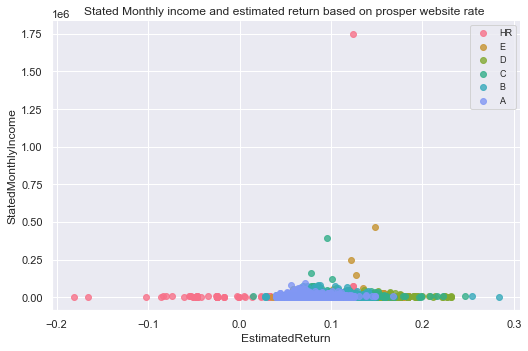

In [97]:
g = sb.FacetGrid(data = df, hue = 'ProsperRating (Alpha)', hue_order = ['HR','E','D','C','B','A','AA'], size = 5, aspect = 1.5 , palette="husl")
g.map(sb.regplot, "EstimatedReturn","StatedMonthlyIncome", fit_reg = False);
plt.title('Stated Monthly income and estimated return based on prosper website rate ');
plt.legend(loc=1, fontsize = 9)

#### this a relation between Estimated return and Stated monthly income with respect to prosper raring

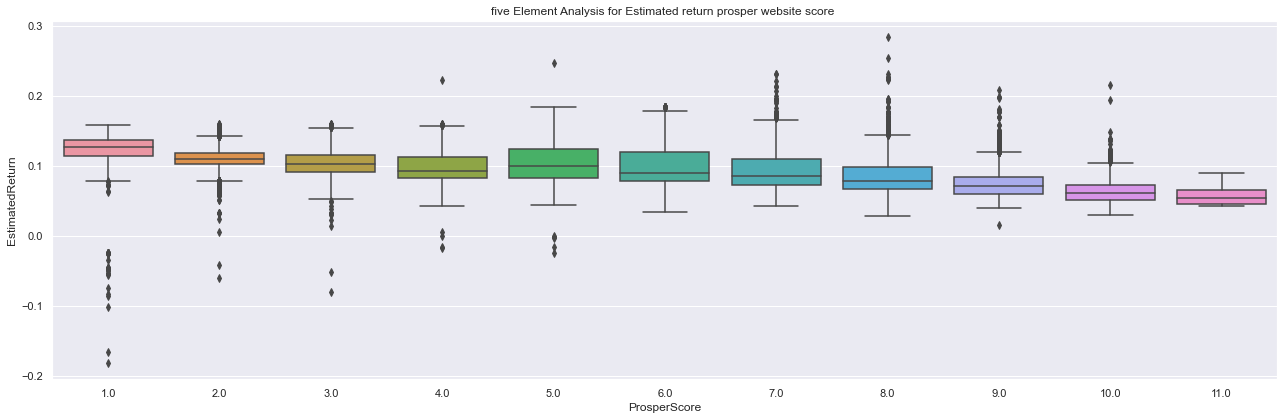

In [98]:
plt.figure(figsize = [18, 6])
sb.boxplot(data = df , x='ProsperScore', y = 'EstimatedReturn')
plt.title('five Element Analysis for Estimated return prosper website score ');
plt.tight_layout();

##### five number analysis between prospor score and Estimated Return¶

In [99]:
df.dropna(subset =  ['ProsperScore', 'Investors'], inplace = True )
df['Investors'].head(20)


1       1
3     158
4      20
5       1
6       1
7       1
8       1
9       1
10     19
12      1
13    171
14    371
15     10
16      8
18    303
19      1
20      1
22     94
23     30
24      1
Name: Investors, dtype: int64

Text(0.5, 0.98, 'Distribustion of prosper Score and Recommendation')

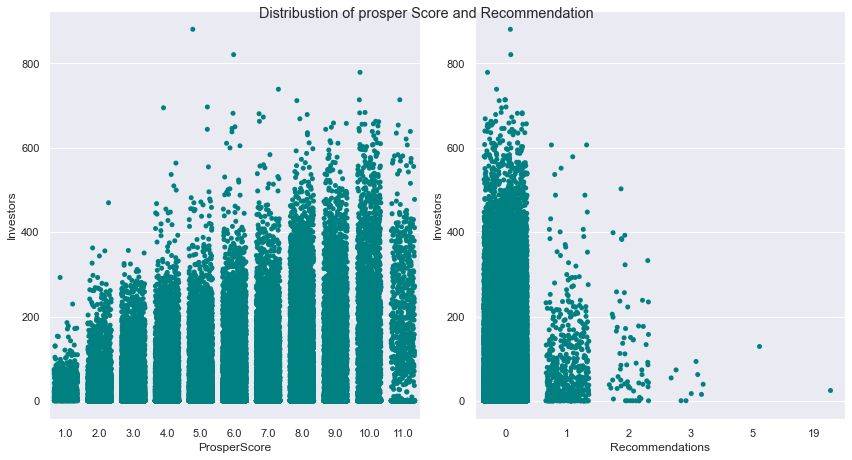

In [100]:
plt.figure(figsize = [12, 6.5])
# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.stripplot(data = df, y = 'Investors', x = 'ProsperScore' , jitter = 0.35 , color =  'teal') 
plt.xlabel('ProsperScore')
plt.ylabel('Investors');
# PLOT ON RIGHT
plt.subplot(1, 2, 2)
sb.stripplot(data = df, y = 'Investors', x = 'Recommendations' , jitter = 0.35 , color =  'teal')
plt.xlabel('Recommendations')
plt.ylabel('Investors')         
plt.tight_layout();
plt.suptitle('Distribustion of prosper Score and Recommendation') 

### this relation to assure the affect of recoomandation and prospor score on recommandation

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?¶
>fisrt i discussed the realtion between income of borrower and income . second showed the correlation BorrowerAnnual per rate >Stated Monthly Income' representing sample prospor rating and estimated return. this a relation between Estimated return and >Stated monthly income with respect to prosper raring. this a relation between Borrow annaul per revnue and Stated monthly ?> >income with respect to prosper raring this relation to assure the affect of recoomandation and prospor score on recommandation

#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
> negative weak correlation correlation BorrowerAnnual per rate Stated Monthly Income. postive relation between prospor score > > and investors also unlikly negative realtion between recommendation and investors

## Mulitvariant 



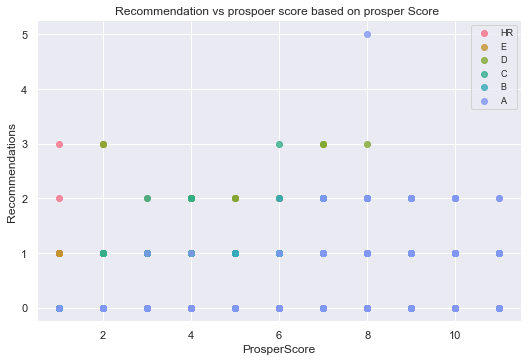

In [101]:
g = sb.FacetGrid(data = df, hue = 'ProsperRating (Alpha)', hue_order = ['HR','E','D','C','B','A','AA'], size = 5, aspect = 1.5 , palette="husl")
g.map(sb.regplot,"ProsperScore" , "Recommendations", fit_reg = False);
plt.title('Recommendation vs prospoer score based on prosper Score ');
plt.legend(loc=1, fontsize = 9)

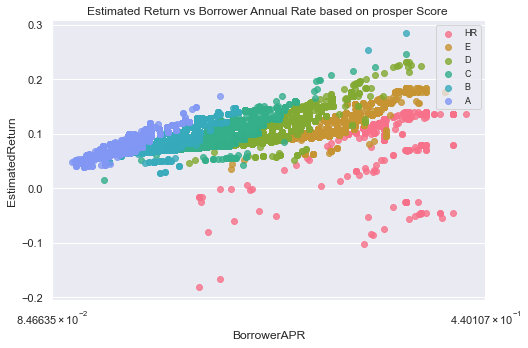

In [102]:
g = sb.FacetGrid(data = df, hue = 'ProsperRating (Alpha)', hue_order = ['HR','E','D','C','B','A','AA'], size = 5, aspect = 1.5 , palette="husl")
g.map(sb.regplot, "BorrowerAPR","EstimatedReturn", fit_reg = False);
plt.legend(loc=1, fontsize = 9)
plt.title('Estimated Return vs Borrower Annual Rate based on prosper Score ');
plt.xscale('symlog')
plt.tight_layout();

### this a relation between Borrow annaul per revnue and Stated monthly income with respect to prosper raring

In [103]:
df["BorrowerAPR"].corr(df["EstimatedReturn"])
sample = np.random.choice(df.shape[0], 20000, replace = False)
df_subset = df.iloc[sample]

# plotting the data


<Figure size 1058.4x595.44 with 0 Axes>

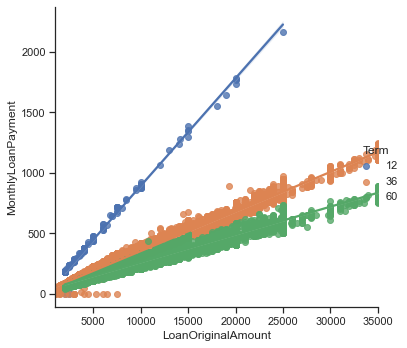

In [104]:
plt.figure(figsize = [14.7, 8.27])
sb.set_theme(style="ticks")

# Load the penguins dataset
penguins = sb.load_dataset("penguins")

# Show the joint distribution using kernel density estimation
g = sb.lmplot(
    data=df,
    y = 'MonthlyLoanPayment', x = 'LoanOriginalAmount', hue= 'Term',
     height=5,
)
plt.tight_layout();

#### show realtion between term of loans period by month and loan original amount with respect to monthly loan payment

In [105]:
df_numeric = ['EstimatedReturn', 'BorrowerAPR', 'Term', 'Investors','MonthlyLoanPayment']
df_categoric = ['IncomeRange', 'CreditScore', 'IsBorrowerHomeowner']


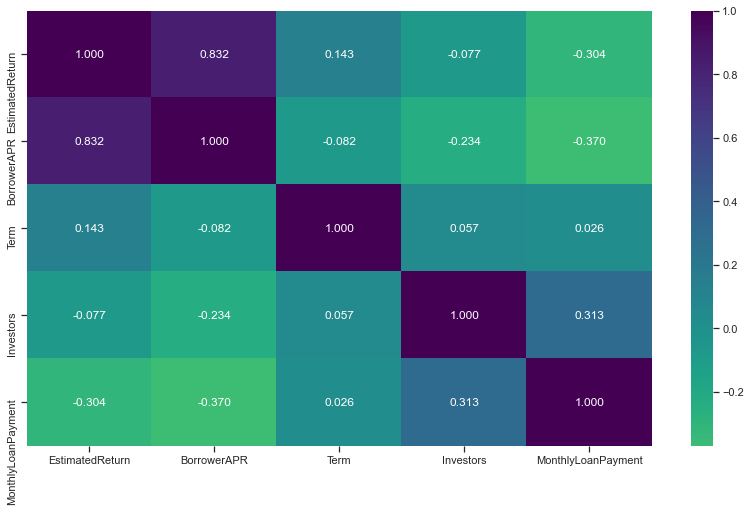

<Figure size 432x288 with 0 Axes>

In [106]:
# correlation plot
plt.figure(figsize = [14, 8])
sb.heatmap(df[df_numeric].corr(), annot = True, fmt = '.3f', cmap = 'viridis_r', center = 0 , label = 'correlation between some numeric values ')
plt.show()
plt.tight_layout();

### heat map for some numeric values which represents correlation between this numeric values


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
>relation between prospor score and recommendation with referance to prospor rating alpha major of with A score this a relation between Borrow annaul per revnue and Stated monthly income with respect to prosper raring show realtion between term of loans period by month and loan original amount with respect to monthly loan payment

#### Were there any interesting or surprising interactions between features?
> correlation between BorrowerAPR EstimatedReturn is 0.8 strong postive relation

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [107]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle

Traceback (most recent call last):
  File "C:\Users\Gemy\Anaconda3\lib\site-packages\traitlets\traitlets.py", line 528, in get
    value = obj._trait_values[self.name]
KeyError: 'template_paths'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Gemy\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Gemy\Anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Gemy\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Gemy\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\Gemy\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 519, in convert_notebooks
    self.exporter = cls(config=self.config)


#                            <br> Thank you <br>